In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class', ylabel='count'>

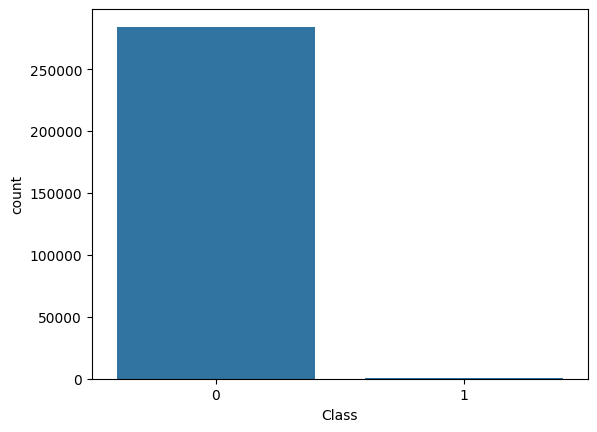

In [6]:
import seaborn as sns
sns.countplot(x="Class", data = data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print(data.shape)

(284807, 31)


In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data['Class']

In [11]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

# Data Splitting

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[85297    11]
 [   31   104]]


In [16]:
print("*Classification Matrix for RF: ")
print(classification_report(y_test, predictions))

*Classification Matrix for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.77      0.83       135

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
val1 = accuracy_score(y_test, predictions) *100
print(val1)

99.95084442259751


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
print('Precision: %.3f' % precision_score(y_test, predictions))
rf_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
rf_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
rf_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
rf_mcc = f1_score(y_test, predictions)

Precision: 0.904
Recall: 0.770
F1 Score: 0.832
MCC: 0.832


In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

model 1 AUC score: 0.9423163821203864


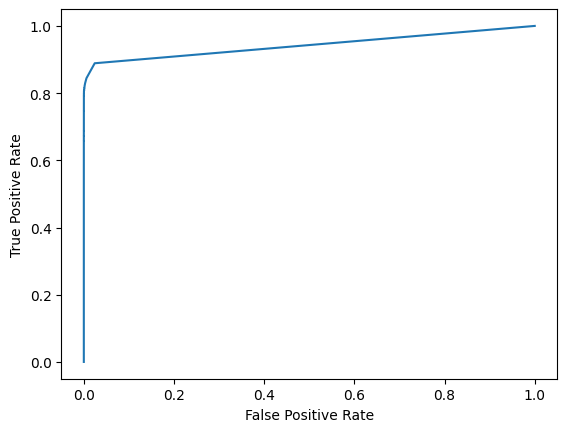

In [20]:
y_proba = RF.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
rf_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [21]:
score = cross_val_score(RF, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99957365 0.99967396 0.99942317 0.99949841 0.99939807]
Average score: 1.00


# Decision Tree

In [22]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[85272    36]
 [   37    98]]


In [23]:
print("*Classification Matrix for DT: ")
print(classification_report(y_test, predictions))

*Classification Matrix for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.73      0.73       135

    accuracy                           1.00     85443
   macro avg       0.87      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
val2 = accuracy_score(y_test, predictions) *100
print(val2)

99.91456292499093


Precision: 0.731
Recall: 0.726
F1 Score: 0.729
MCC: 0.729
model 1 AUC score: 0.8627519628222962


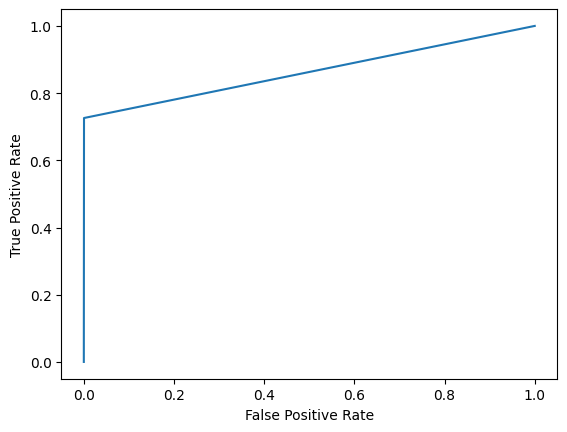

In [25]:
print('Precision: %.3f' % precision_score(y_test, predictions))
dt_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
dt_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
dt_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
dt_mcc = f1_score(y_test, predictions)

y_proba = DT.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
dt_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [26]:
score = cross_val_score(DT, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99879618 0.99934793 0.99902189 0.99912221 0.99889647]
Average score: 1.00


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Matrix for LR: ")
print(classification_report(y_test, predictions))
val3 = accuracy_score(y_test, predictions) *100
print(val3)

*Confusion Matrix for LR: 
[[85272    36]
 [   51    84]]
*Classification Matrix for LR: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.70      0.62      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

99.89817773252344


Precision: 0.700
Recall: 0.622
F1 Score: 0.659
MCC: 0.659
model 1 AUC score: 0.8815159535209238


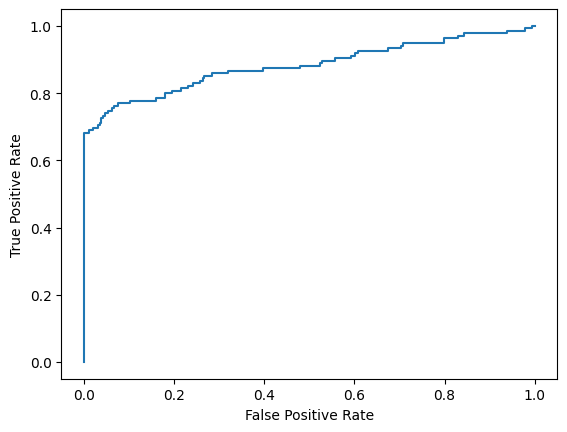

In [28]:
print('Precision: %.3f' % precision_score(y_test, predictions))
lr_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
lr_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
lr_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
lr_mcc = f1_score(y_test, predictions)

y_proba = LR.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
lr_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [29]:
score = cross_val_score(LR, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99882126 0.99939809 0.99909713 0.99904697 0.99894663]
Average score: 1.00


# LightGBM

In [30]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)
predictions = LGBM.predict(X_test)
print("*Confusion Matrix for LGBM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Matrix for LGBM: ")
print(classification_report(y_test, predictions))
val5 = accuracy_score(y_test, predictions) *100
print(val5)

[LightGBM] [Info] Number of positive: 357, number of negative: 199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001791 -> initscore=-6.323359
[LightGBM] [Info] Start training from score -6.323359
*Confusion Matrix for LGBM: 
[[85208   100]
 [   48    87]]
*Classification Matrix for LGBM: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.47      0.64      0.54       135

    accuracy                           1.00     85443
   macro avg       0.73      0.82      0.77     85443
weighted avg       1.00      1.00      1.00     85443

99.8267851082008


Precision: 0.465
Recall: 0.644
F1 Score: 0.540
MCC: 0.540
model 1 AUC score: 0.860919430942172


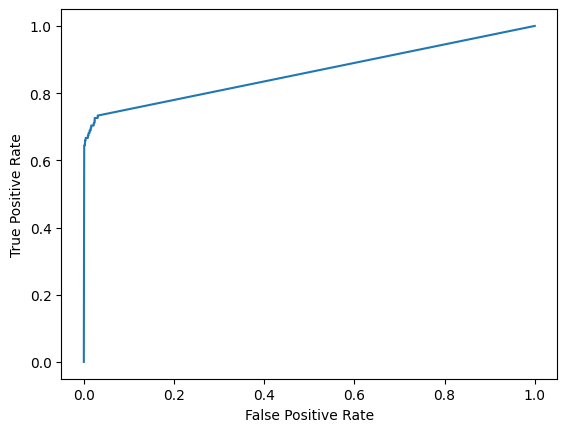

In [31]:
print('Precision: %.3f' % precision_score(y_test, predictions))
lgb_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
lgb_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
lgb_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
lgb_mcc = f1_score(y_test, predictions)

y_proba = LGBM.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
lgb_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [32]:
score = cross_val_score(LGBM, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
[LightGBM] [

# XGBoost

In [33]:
from xgboost import XGBClassifier
XGb = XGBClassifier()
XGb.fit(X_train, y_train)
predictions = XGb.predict(X_test)
print("*Confusion Matrix for XGb: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Matrix for XGb: ")
print(classification_report(y_test, predictions))
val6 = accuracy_score(y_test, predictions) *100
print(val6)

*Confusion Matrix for XGb: 
[[85297    11]
 [   31   104]]
*Classification Matrix for XGb: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.77      0.83       135

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

99.95084442259751


Precision: 0.904
Recall: 0.770
F1 Score: 0.832
MCC: 0.832
model 1 AUC score: 0.9789892051286059


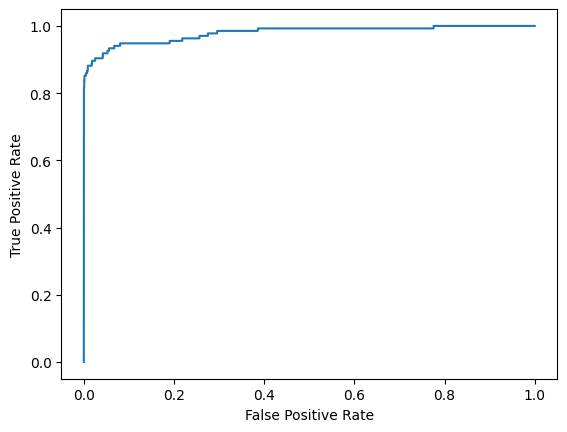

In [34]:
print('Precision: %.3f' % precision_score(y_test, predictions))
xgb_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
xgb_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
xgb_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
xgb_mcc = f1_score(y_test, predictions)

y_proba = XGb.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
xgb_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [35]:
score = cross_val_score(XGb, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99952349 0.99969904 0.99947333 0.99954857 0.99947331]
Average score: 1.00


# CatBoost

In [36]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("*Confusion Matrix for Cat: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Matrix for Cat: ")
print(classification_report(y_test, predictions))
val7 = accuracy_score(y_test, predictions) *100
print(val7)

0:	learn: 0.3634703	total: 140ms	remaining: 561ms
1:	learn: 0.1959751	total: 161ms	remaining: 241ms
2:	learn: 0.1047507	total: 182ms	remaining: 121ms
3:	learn: 0.0587404	total: 200ms	remaining: 50.1ms
4:	learn: 0.0350236	total: 221ms	remaining: 0us
*Confusion Matrix for Cat: 
[[85294    14]
 [   54    81]]
*Classification Matrix for Cat: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.85      0.60      0.70       135

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

99.9204147794436


Precision: 0.853
Recall: 0.600
F1 Score: 0.704
MCC: 0.704
model 1 AUC score: 0.9741770560357329


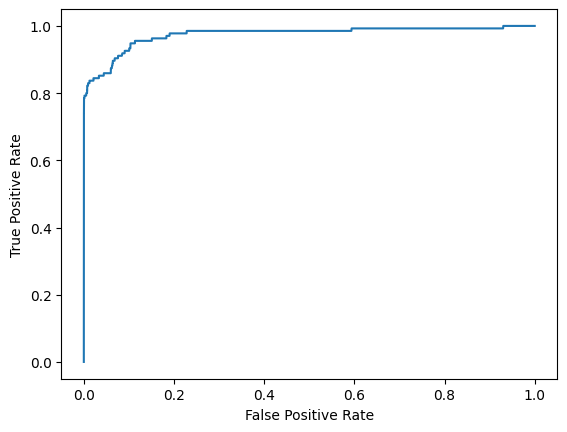

In [37]:
print('Precision: %.3f' % precision_score(y_test, predictions))
cat_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
cat_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
cat_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
cat_mcc = f1_score(y_test, predictions)

y_proba = clf.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
cat_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [38]:
score = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

0:	learn: 0.3636034	total: 20.8ms	remaining: 83.1ms
1:	learn: 0.1978079	total: 43.4ms	remaining: 65.1ms
2:	learn: 0.1079142	total: 66.1ms	remaining: 44ms
3:	learn: 0.0604751	total: 89.1ms	remaining: 22.3ms
4:	learn: 0.0361813	total: 107ms	remaining: 0us
0:	learn: 0.3633228	total: 20.8ms	remaining: 83.3ms
1:	learn: 0.1953506	total: 39.4ms	remaining: 59.1ms
2:	learn: 0.1045489	total: 59.2ms	remaining: 39.4ms
3:	learn: 0.0585466	total: 76.9ms	remaining: 19.2ms
4:	learn: 0.0346211	total: 96.5ms	remaining: 0us
0:	learn: 0.3655142	total: 17.1ms	remaining: 68.3ms
1:	learn: 0.1976113	total: 33.8ms	remaining: 50.7ms
2:	learn: 0.1056342	total: 50.1ms	remaining: 33.4ms
3:	learn: 0.0598778	total: 66.5ms	remaining: 16.6ms
4:	learn: 0.0357867	total: 82.2ms	remaining: 0us
0:	learn: 0.3653531	total: 21.2ms	remaining: 84.8ms
1:	learn: 0.1973261	total: 41ms	remaining: 61.5ms
2:	learn: 0.1077854	total: 60.1ms	remaining: 40.1ms
3:	learn: 0.0607871	total: 78.3ms	remaining: 19.6ms
4:	learn: 0.0362028	total:

# Voting Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LGBMClassifier()
clf2 = XGBClassifier()
clf3 = CatBoostClassifier()
eclf1 = VotingClassifier(estimators=[('LG', clf1), ('XG', clf2), ('CAT', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

[LightGBM] [Info] Number of positive: 357, number of negative: 199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001791 -> initscore=-6.323359
[LightGBM] [Info] Start training from score -6.323359
Learning rate set to 0.098829
0:	learn: 0.3664035	total: 21.4ms	remaining: 21.4s
1:	learn: 0.1989894	total: 42.7ms	remaining: 21.3s
2:	learn: 0.1070480	total: 63.2ms	remaining: 21s
3:	learn: 0.0603104	total: 82.3ms	remaining: 20.5s
4:	learn: 0.0360666	total: 101ms	remaining: 20.1s
5:	learn: 0.0230044	total: 119ms	remaining: 19.7s
6:	learn: 0.0156897	total: 137ms	remaining: 19.5s
7:	learn: 0.0112873	total: 155ms	remaining: 19.2s
8:	learn: 0.0086621	total: 174ms	remaining: 19.1s
9:	learn: 0.0067793	tota

In [40]:
print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Classification Matrix for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.95      0.79      0.86       135

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
val8 = accuracy_score(y_test, predictions) *100
print(val8)

99.95903701883127


Precision: 0.946
Recall: 0.785
F1 Score: 0.858
MCC: 0.858
model 1 AUC score: 0.9754493955670868


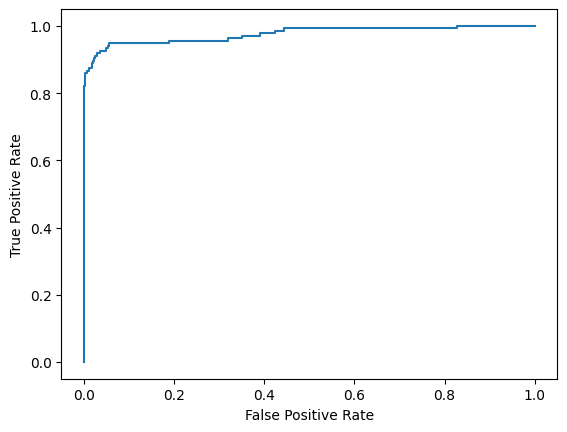

In [42]:
print('Precision: %.3f' % precision_score(y_test, predictions))
vot1_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
vot1_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
vot1_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
vot1_mcc = f1_score(y_test, predictions)

y_proba = eclf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
vot1_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [43]:
score = cross_val_score(eclf1, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
Learning rate set to 0.089847
0:	learn: 0.3897438	total: 17.1ms	remaining: 17.1s
1:	learn: 0.2255645	total: 34ms	remaining: 17s
2:	learn: 0.1286086	total: 52.4ms	remaining: 17.4s
3:	learn: 0.0755065	total: 67.8ms	remaining: 16.9s
4:	learn: 0.0476748	total: 84.6ms	remaining: 16.8s
5:	learn: 0.0307502	total: 100ms	remaining: 16.6s
6:	learn: 0.0209030	total: 117ms	remaining: 16.6s
7:	learn: 0.0147824	total: 132ms	remaining: 16.3s
8:	learn: 0.0110551	total: 147ms	remaining: 16.2s
9:	learn: 0.0084665	total

# Voting Classifier

In [44]:
clf1 = LGBMClassifier()
clf2 = XGBClassifier()

eclf1 = VotingClassifier(estimators=[('LG', clf1), ('XG', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y_test, predictions))

val9 = accuracy_score(y_test, predictions) *100
print(val9)

[LightGBM] [Info] Number of positive: 357, number of negative: 199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001791 -> initscore=-6.323359
[LightGBM] [Info] Start training from score -6.323359
*Confusion Matrix for Voting Classifier: 
[[85221    87]
 [   48    87]]
*Classification Matrix for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.50      0.64      0.56       135

    accuracy                           1.00     85443
   macro avg       0.75      0.82      0.78     85443
weighted avg       1.00      1.00      1.00     85443

99.84199992977774


Precision: 0.500
Recall: 0.644
F1 Score: 0.563
MCC: 0.563
model 1 AUC score: 0.9786556859762187


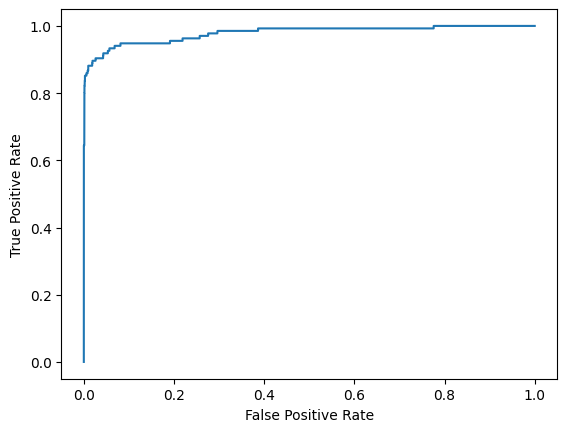

In [45]:
print('Precision: %.3f' % precision_score(y_test, predictions))
vot2_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
vot2_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
vot2_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
vot2_mcc = f1_score(y_test, predictions)

y_proba = eclf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
vot2_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [46]:
score = cross_val_score(eclf1, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
[LightGBM] [

# Voting Classifier

In [47]:
clf1 = LGBMClassifier()
clf2 = CatBoostClassifier()

eclf1 = VotingClassifier(estimators=[('LG', clf1), ('CAT', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y_test, predictions))

val10 = accuracy_score(y_test, predictions) *100
print(val10)

[LightGBM] [Info] Number of positive: 357, number of negative: 199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001791 -> initscore=-6.323359
[LightGBM] [Info] Start training from score -6.323359
Learning rate set to 0.098829
0:	learn: 0.3664035	total: 18.3ms	remaining: 18.3s
1:	learn: 0.1989894	total: 37.1ms	remaining: 18.5s
2:	learn: 0.1070480	total: 55.9ms	remaining: 18.6s
3:	learn: 0.0603104	total: 73.8ms	remaining: 18.4s
4:	learn: 0.0360666	total: 92ms	remaining: 18.3s
5:	learn: 0.0230044	total: 109ms	remaining: 18.1s
6:	learn: 0.0156897	total: 127ms	remaining: 18s
7:	learn: 0.0112873	total: 144ms	remaining: 17.9s
8:	learn: 0.0086621	total: 162ms	remaining: 17.8s
9:	learn: 0.0067793	total

Precision: 0.500
Recall: 0.644
F1 Score: 0.563
MCC: 0.563
model 1 AUC score: 0.9732462241394582


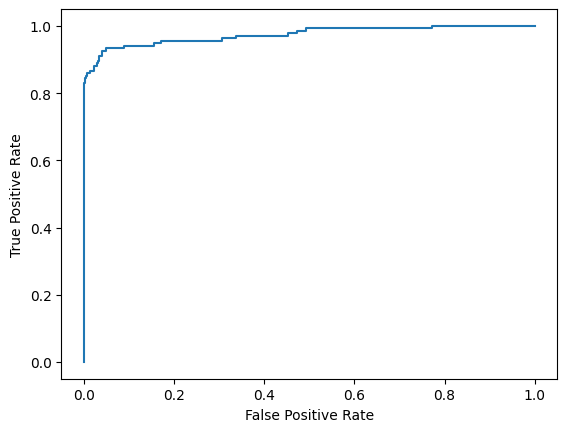

In [48]:
print('Precision: %.3f' % precision_score(y_test, predictions))
vot3_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
vot3_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
vot3_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
vot3_mcc = f1_score(y_test, predictions)

y_proba = eclf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
vot3_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [49]:
score = cross_val_score(eclf1, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

[LightGBM] [Info] Number of positive: 286, number of negative: 159205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001793 -> initscore=-6.321956
[LightGBM] [Info] Start training from score -6.321956
Learning rate set to 0.089847
0:	learn: 0.3897438	total: 18.2ms	remaining: 18.1s
1:	learn: 0.2255645	total: 35.5ms	remaining: 17.7s
2:	learn: 0.1286086	total: 52.9ms	remaining: 17.6s
3:	learn: 0.0755065	total: 70.3ms	remaining: 17.5s
4:	learn: 0.0476748	total: 85.4ms	remaining: 17s
5:	learn: 0.0307502	total: 100ms	remaining: 16.6s
6:	learn: 0.0209030	total: 116ms	remaining: 16.4s
7:	learn: 0.0147824	total: 131ms	remaining: 16.2s
8:	learn: 0.0110551	total: 147ms	remaining: 16.2s
9:	learn: 0.0084665	tot

# Voting CLassifier

In [50]:
clf1 = XGBClassifier()
clf2 = CatBoostClassifier()

eclf1 = VotingClassifier(estimators=[('XG', clf1), ('CAT', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y_test, predictions))

val11 = accuracy_score(y_test, predictions) *100
print(val11)

Learning rate set to 0.098829
0:	learn: 0.3664035	total: 20.8ms	remaining: 20.8s
1:	learn: 0.1989894	total: 41.2ms	remaining: 20.5s
2:	learn: 0.1070480	total: 62.6ms	remaining: 20.8s
3:	learn: 0.0603104	total: 82.4ms	remaining: 20.5s
4:	learn: 0.0360666	total: 103ms	remaining: 20.6s
5:	learn: 0.0230044	total: 123ms	remaining: 20.4s
6:	learn: 0.0156897	total: 143ms	remaining: 20.3s
7:	learn: 0.0112873	total: 165ms	remaining: 20.4s
8:	learn: 0.0086621	total: 190ms	remaining: 21s
9:	learn: 0.0067793	total: 220ms	remaining: 21.8s
10:	learn: 0.0055622	total: 251ms	remaining: 22.6s
11:	learn: 0.0047008	total: 277ms	remaining: 22.8s
12:	learn: 0.0041434	total: 299ms	remaining: 22.7s
13:	learn: 0.0037567	total: 318ms	remaining: 22.4s
14:	learn: 0.0034704	total: 338ms	remaining: 22.2s
15:	learn: 0.0032441	total: 364ms	remaining: 22.4s
16:	learn: 0.0030851	total: 385ms	remaining: 22.3s
17:	learn: 0.0029512	total: 406ms	remaining: 22.2s
18:	learn: 0.0028410	total: 426ms	remaining: 22s
19:	learn: 

Precision: 0.929
Recall: 0.778
F1 Score: 0.847
MCC: 0.847
model 1 AUC score: 0.9756255763429769


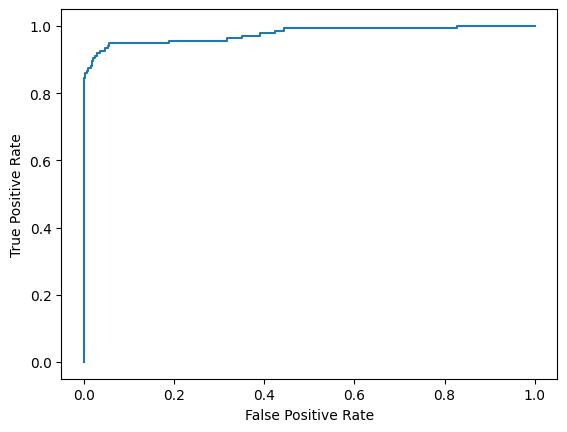

In [51]:
print('Precision: %.3f' % precision_score(y_test, predictions))
vot4_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
vot4_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
vot4_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
vot4_mcc = f1_score(y_test, predictions)

y_proba = eclf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
vot4_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [52]:
score = cross_val_score(eclf1, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Learning rate set to 0.089847
0:	learn: 0.3897438	total: 20.8ms	remaining: 20.8s
1:	learn: 0.2255645	total: 42.5ms	remaining: 21.2s
2:	learn: 0.1286086	total: 63.3ms	remaining: 21s
3:	learn: 0.0755065	total: 80.8ms	remaining: 20.1s
4:	learn: 0.0476748	total: 98.3ms	remaining: 19.6s
5:	learn: 0.0307502	total: 115ms	remaining: 19.1s
6:	learn: 0.0209030	total: 133ms	remaining: 18.8s
7:	learn: 0.0147824	total: 149ms	remaining: 18.4s
8:	learn: 0.0110551	total: 167ms	remaining: 18.4s
9:	learn: 0.0084665	total: 184ms	remaining: 18.2s
10:	learn: 0.0067849	total: 216ms	remaining: 19.4s
11:	learn: 0.0056690	total: 243ms	remaining: 20s
12:	learn: 0.0049455	total: 261ms	remaining: 19.9s
13:	learn: 0.0043837	total: 279ms	remaining: 19.7s
14:	learn: 0.0039275	total: 297ms	remaining: 19.5s
15:	learn: 0.0035841	total: 314ms	remaining: 19.3s
16:	learn: 0.0033604	total: 333ms	remaining: 19.3s
17:	learn: 0.0031405	total: 351ms	remaining: 19.1s
18:	learn: 0.0029871	total: 368ms	remaining: 19s
19:	learn: 0

# ANN

In [53]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(random_state=1, max_iter=300)
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for ANN: 
[[85304     4]
 [  119    16]]


In [54]:
print("*Classification Matrix for ANN: ")
print(classification_report(y_test, predictions))

*Classification Matrix for ANN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.80      0.12      0.21       135

    accuracy                           1.00     85443
   macro avg       0.90      0.56      0.60     85443
weighted avg       1.00      1.00      1.00     85443



In [55]:
val12 = accuracy_score(y_test, predictions) *100
print(val12)

99.85604438046417


Precision: 0.800
Recall: 0.119
F1 Score: 0.206
MCC: 0.206
model 1 AUC score: 0.552994856111797


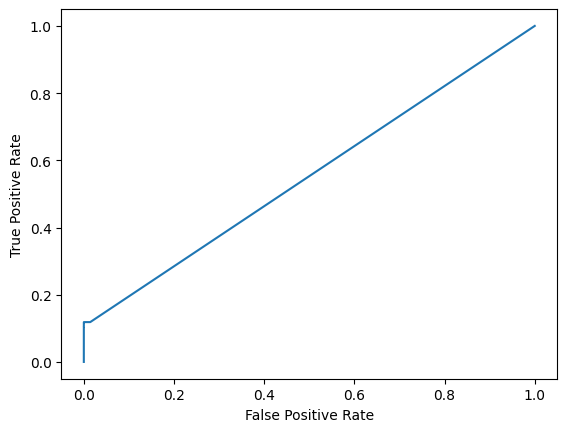

In [56]:
print('Precision: %.3f' % precision_score(y_test, predictions))
mlp_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
mlp_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
mlp_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
mlp_mcc = f1_score(y_test, predictions)

y_proba = clf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
mlp_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [57]:
score = cross_val_score(clf1, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99804379 0.9985203  0.99709076 0.99897174 0.99801866]
Average score: 1.00


# Stacking Classifier

In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('sgd',SGDClassifier(max_iter=1000, tol=1e-3))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("*Confusion Matrix for Stack: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Stack: 
[[85308     0]
 [  135     0]]


In [59]:
print("*Classification Matrix for Stacking: ")
print(classification_report(y_test, predictions))

*Classification Matrix for Stacking: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
val13 = accuracy_score(y_test, predictions) *100
print(val13)

99.84199992977774


Precision: 0.000
Recall: 0.000
F1 Score: 0.000
MCC: 0.000
model 1 AUC score: 0.552994856111797


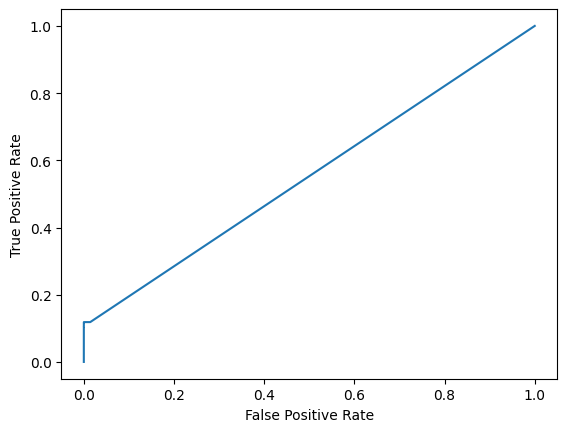

In [61]:
print('Precision: %.3f' % precision_score(y_test, predictions))
sta_prec = precision_score(y_test, predictions)
print('Recall: %.3f' % recall_score(y_test, predictions))
sta_rec = recall_score(y_test, predictions)
print('F1 Score: %.3f' % f1_score(y_test, predictions))
sta_f1 = f1_score(y_test, predictions)
print('MCC: %.3f' % f1_score(y_test, predictions))
sta_mcc = f1_score(y_test, predictions)

y_proba = clf1.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba)
sta_auc = roc_auc_score(y_test, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba)}')

In [62]:
score = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.99821935 0.99957365 0.99819427 0.99954857 0.99927267]
Average score: 1.00


# Comparison

In [63]:
score = [val1,val2,val3,val5,val6,val7,val8,val9,val10,val11,val12,val13]

In [64]:
score1 = [rf_prec,dt_prec,lr_prec,lgb_prec,xgb_prec,cat_prec,vot1_prec,vot2_prec,vot3_prec,vot4_prec,mlp_prec,sta_prec]

In [65]:
score2 = [rf_rec,dt_rec,lr_rec,lgb_rec,xgb_rec,cat_rec,vot1_rec,vot2_rec,vot3_rec,vot4_rec,mlp_rec,sta_rec]

In [66]:
score3 = [rf_f1,dt_f1,lr_f1,lgb_f1,xgb_f1,cat_f1,vot1_f1,vot2_f1,vot3_f1,vot4_f1,mlp_f1,sta_f1]

In [67]:
score4 = [rf_mcc,dt_mcc,lr_mcc,lgb_mcc,xgb_mcc,cat_mcc,vot1_mcc,vot2_mcc,vot3_mcc,vot4_mcc,mlp_mcc,sta_mcc]

In [68]:
score5 = [rf_auc,dt_auc,lr_auc,lgb_auc,xgb_auc,cat_auc,vot1_auc,vot2_auc,vot3_auc,vot4_auc,mlp_auc,sta_auc]

In [69]:
#make variabel for save the result and to show it
classifier = ('RF','DT','LR','LGBM','XGB','CAT','VOT - LG + XG + CAT','VOT - LG + XG','VOT - LG + CAT','VOT - CAT + XG','ANN','Stacking Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)
print(score1)
print(score2)
print(score3)
print(score4)
print(score5)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[99.95084442259751, 99.91456292499093, 99.89817773252344, 99.8267851082008, 99.95084442259751, 99.9204147794436, 99.95903701883127, 99.84199992977774, 99.84199992977774, 99.95552590615966, 99.85604438046417, 99.84199992977774]
[0.9043478260869565, 0.7313432835820896, 0.7, 0.46524064171123, 0.9043478260869565, 0.8526315789473684, 0.9464285714285714, 0.5, 0.5, 0.9292035398230089, 0.8, 0.0]
[0.7703703703703704, 0.725925925925926, 0.6222222222222222, 0.6444444444444445, 0.7703703703703704, 0.6, 0.7851851851851852, 0.6444444444444445, 0.6444444444444445, 0.7777777777777778, 0.11851851851851852, 0.0]
[0.832, 0.7286245353159851, 0.6588235294117647, 0.5403726708074534, 0.832, 0.7043478260869566, 0.8582995951417004, 0.5631067961165048, 0.5631067961165048, 0.8467741935483871, 0.2064516129032258, 0.0]
[0.832, 0.7286245353159851, 0.6588235294117647, 0.5403726708074534, 0.832, 0.7043478260869566, 0.8582995951417004, 0.5631067961165048, 0.5631067961165048, 0.846

# Accuracy

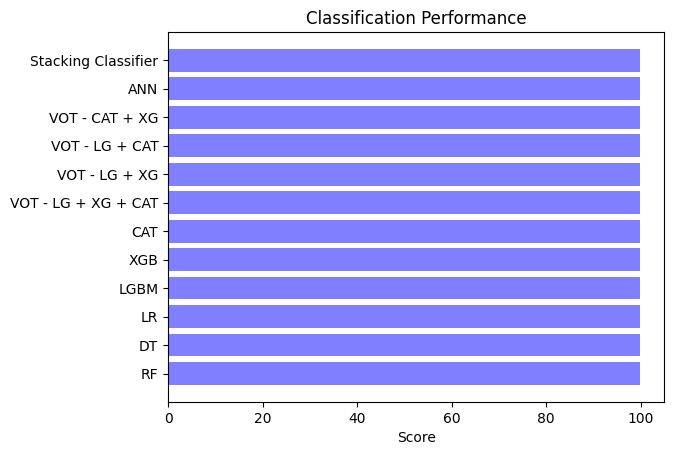

In [70]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

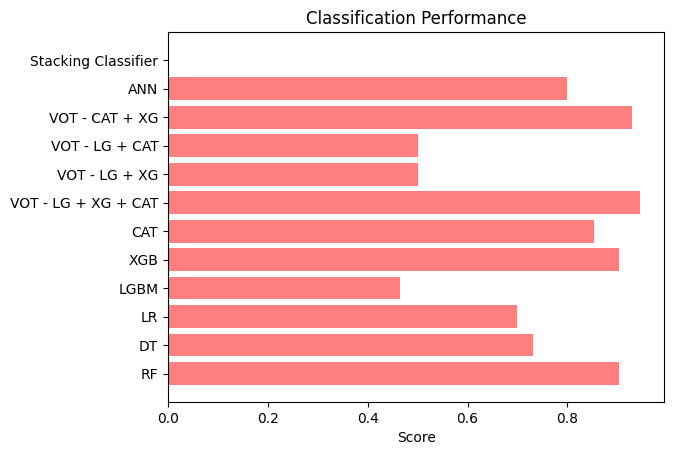

In [71]:
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

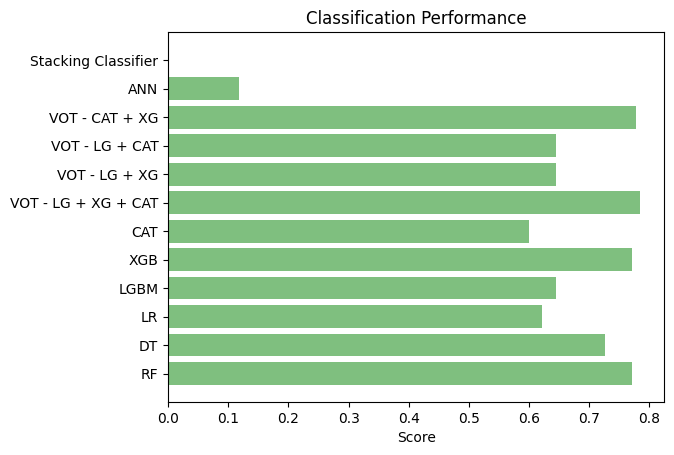

In [72]:
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

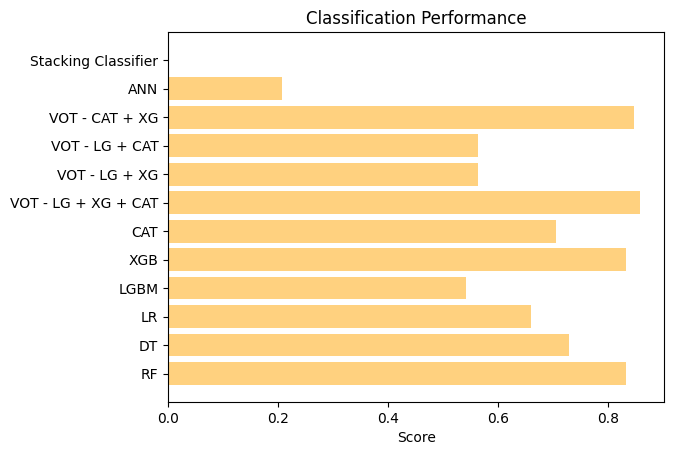

In [73]:
plt2.barh(y_pos, score3, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

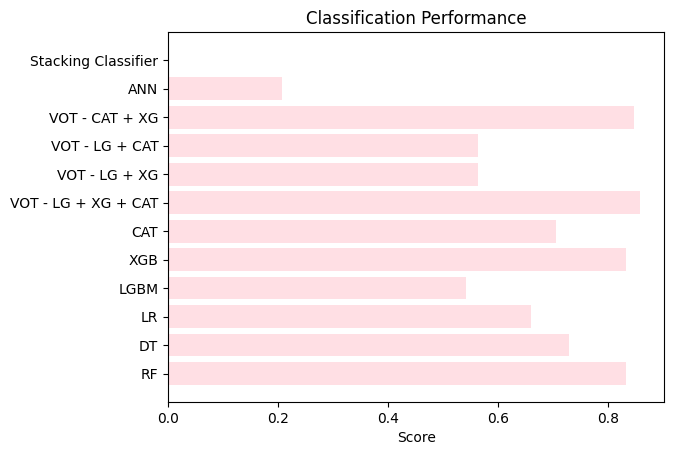

In [74]:
plt2.barh(y_pos, score4, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

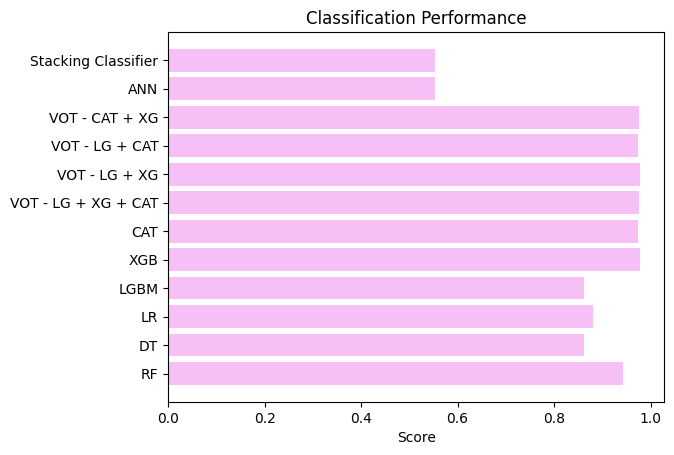

In [75]:
plt2.barh(y_pos, score5, align='center', alpha=0.5,color='violet')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [76]:
import joblib

In [77]:
filename = 'model_rf.sav'
joblib.dump(RF, filename)

['model_rf.sav']